In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from matplotlib import pyplot
import numpy as np

In [2]:
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [3]:
batch_size = 100
total_batch = int(mnist.train.num_examples/batch_size)
N_EPOCHS = 15
LEARNING_RATE=0.001

In [4]:
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])
is_training = tf.placeholder(tf.bool)

In [5]:
L1 = tf.layers.conv2d(X, 32, [3, 3], activation=tf.nn.relu)
L1 = tf.layers.max_pooling2d(L1, [2, 2], [2, 2])
L1 = tf.layers.dropout(L1, 0.7, is_training)

L2 = tf.layers.conv2d(L1, 64, [3, 3], activation=tf.nn.relu)
L2 = tf.layers.max_pooling2d(L2, [2, 2], [2, 2])
L2 = tf.layers.dropout(L2, 0.7, is_training)

L3 = tf.contrib.layers.flatten(L2)
L3 = tf.layers.dense(L3, 256, activation=tf.nn.relu)
L3 = tf.layers.dropout(L3, 0.5, is_training)

In [6]:
model = tf.layers.dense(L3, 10, activation=None)

In [7]:
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
        logits=model, 
        labels=Y
    )
)
optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE)
train_op = optimizer.minimize(cost, name="train_op")

In [8]:
init_op = tf.global_variables_initializer()

In [9]:
with tf.Session() as s:
    s.run(init_op)
    for e in range(N_EPOCHS):
        total_cost = 0

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            batch_xs = batch_xs.reshape(-1, 28, 28, 1)
            c, _ = s.run([cost, train_op],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          is_training: True})
        total_cost += c
        print('epoch: %4d, cost: %4f' % (e,c))

epoch:    0, cost: 0.046125
epoch:    1, cost: 0.006419
epoch:    2, cost: 0.041291
epoch:    3, cost: 0.007174
epoch:    4, cost: 0.025586
epoch:    5, cost: 0.027078
epoch:    6, cost: 0.007503
epoch:    7, cost: 0.015647
epoch:    8, cost: 0.045096
epoch:    9, cost: 0.000473
epoch:   10, cost: 0.001911
epoch:   11, cost: 0.005106
epoch:   12, cost: 0.001631
epoch:   13, cost: 0.006270
epoch:   14, cost: 0.000291


In [10]:
with tf.Session() as s:
    s.run(init_op)
    is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    print('test accuracy:', s.run(accuracy,
                             feed_dict={
                                 X: mnist.test.images.reshape(-1, 28, 28, 1),
                                 Y: mnist.test.labels,
                                 is_training: False}
                            )
         )

test accuracy: 0.0717


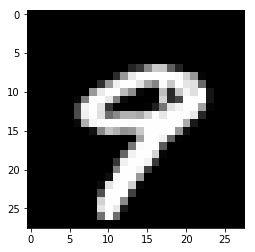

In [11]:
num = 9
img = mnist.test.images[num]
pyplot.imshow(
    np.reshape(
        img, 
        [28,28]
    ), 
    interpolation="nearest", 
    cmap="gray"
)
pyplot.show()

In [12]:
print(mnist.test.labels[num])
img = img.reshape(-1, 28, 28, 1)
with tf.Session() as s:
    predict=tf.argmax(Y, 1)
    print(predict.eval(feed_dict={X: img}, session=s))


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_1' with dtype float and shape [?,10]
	 [[Node: Placeholder_1 = Placeholder[dtype=DT_FLOAT, shape=[?,10], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder_1', defined at:
  File "/usr/local/Cellar/python/3.6.4_4/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python/3.6.4_4/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-dc603539fecd>", line 2, in <module>
    Y = tf.placeholder(tf.float32, [None, 10])
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1746, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3051, in _placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3271, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1650, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_1' with dtype float and shape [?,10]
	 [[Node: Placeholder_1 = Placeholder[dtype=DT_FLOAT, shape=[?,10], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [ ]:
with tf.Session() as s:
    predict_value = s.run(
        predict, 
        feed_dict={
            X:img
        }
    )
    _ = pyplot.plot(predict_value, 'ro')
    title = 'Vorhersage fuer Bild %s' % str(num)
    pyplot.title(title)
    pyplot.show()